# Самостоятельный проект

## Тема проекта: нейронная сеть для предсказания цифр

## Суть проекта: Создания модели для предсказания цифры, в зависимости от полученного изображения

## План работы:
- #### Закрузка данных
- #### Построение и обучение модели
- #### Проверка точности модели
- #### Создание API
- #### Создание приложение

#### Импорт библиотек

In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Загрузка данных

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

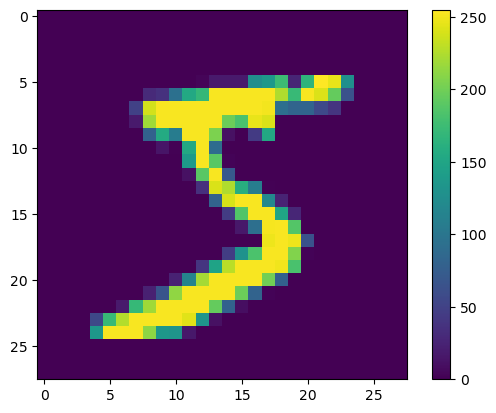

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Нормализация данных

In [9]:
x_train = x_train / 255
x_test = x_test / 255

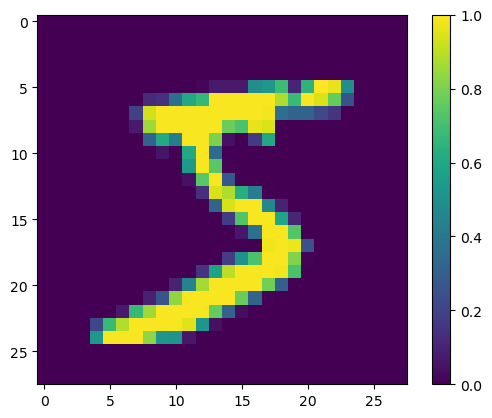

In [10]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

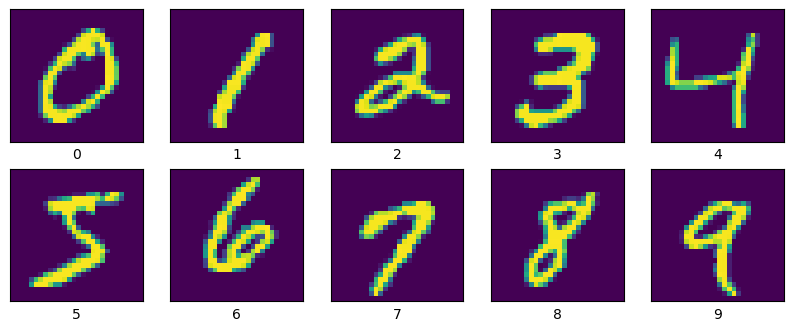

In [11]:
plt.figure(figsize=(10,10))
for i in range(10):
    index_digit = y_train.tolist().index(i)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[index_digit])
    plt.xlabel(i)

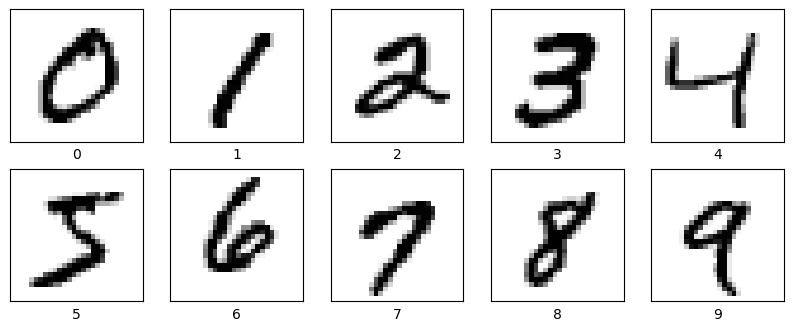

In [12]:
plt.figure(figsize=(10,10))
for i in range(10):
    index_digit = y_train.tolist().index(i)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[index_digit], cmap=plt.cm.binary)
    plt.xlabel(i)

## Построение и обучение модели

In [294]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(64, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])

In [296]:
model.compile(optimizer=tf.keras.optimizers.Nadam(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], steps_per_execution=1875)

In [298]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [300]:
model.fit(x_train, y_train, epochs=300)

Epoch 1/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9383 - loss: 0.2089
Epoch 2/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9710 - loss: 0.0914
Epoch 3/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0636
Epoch 4/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0495
Epoch 5/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0398
Epoch 6/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9890 - loss: 0.0341
Epoch 7/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.9907 - loss: 0.0293
Epoch 8/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0243
Epoch 9/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9927 - loss: 0.0231
Epoch 10/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0189
Epoch 11/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0187
Epoch 12/300
1875

## Проверка точности модели

In [302]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9844 - loss: 0.4827                                                                                                      
Test accuracy: 0.9843999743461609


In [305]:
predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step


In [306]:
np.argmax(predictions[0])

5

In [307]:
y_train[0]

5

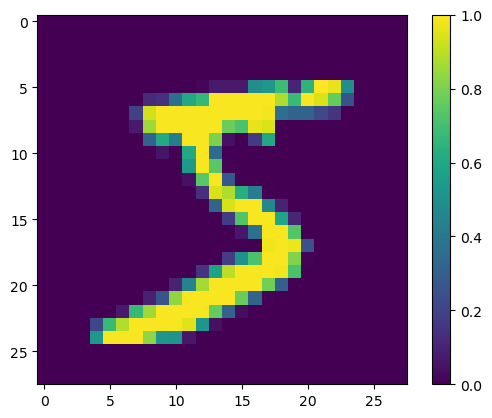

In [308]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [309]:
class_names[np.argmax(predictions[0])]

'5'

In [310]:
count_rigth_pred = 0

In [311]:
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == y_train[i]:
        count_rigth_pred += 1

In [312]:
print(f'Количество правильно предсказанных ответов: {count_rigth_pred} из {len(predictions)}\n\nТочность: {count_rigth_pred / len(predictions)}')

Количество правильно предсказанных ответов: 60000 из 60000

Точность: 1.0


In [313]:
model.save('modelNN.h5')

In [314]:
model.save_weights('modelNN.weights.h5')

In [315]:
with open('class_names.txt', 'w') as file:
    file.write(','.join(class_names))

## Вывод

После проделанной работы, а именно:
- ##### Закрузка данных
- ##### Построение и обучение модели
- ##### Проверка точности модели
- ##### Создание API
- ##### Создание приложение
У нас получилась очень хорошая модель нейронной сети, которая достаточно хорошо предсказывает фотографии цифр. Модель получалась с точностью 1.0 на тренировачных данных и 0.98 на тестовых данных. 